# Języki i Biblioteki Analizy Danych
## Laboratorium 11.: Sklearn
#### mgr inż. Zbigniew Kaleta

https://scikit-learn.org/

Sklearn = Scikit learn - algorytmy uczenia maszynowego dla Pythona

### Obszary zastosowań:
- klasyfikacja
- regresja
- klasteryzacja
- redukcja wymiarów
- metaoptymalizacja - dobór parametrów modelu
- preprocessing - normalizacja, dyskretyzacja etc.

### Uzupełniające biblioteki:
- numpy
- pandas - formaty plików oraz eksploracja danych
- matplotlib - wizualizacja

### Alternatywy:
- TensorFlow (Keras)
- pyTorch (sieci neuronowe)

### Ogólna procedura

1. Przygotować wektory danych treningowych i testowych
1. Zainstancjonować wybrany model
1. Wywołać metodę `fit` od zbioru treningowego
1. Opcjonalnie sprawdzić jakość modelu przy pomocy metody `score` (znaczenie zależne od modelu; im większa wartość tym lepiej)
1. Stosować w systemie docelowym metodę `predict`/`transform`

### Ocena klasyfikacji binarnej:

$$ Accuracy = \frac{\text{przypadki poprawnie zaklasyfikowane}}{\text{wszystkie przypadki}} = \frac{|TP| + |TN|}{|TP| + |TN| + |FP| + |FN|} $$

- klasyfikator dał odpowiedź 1, poprawna odpowiedź 1 - True Positive
- klasyfikator dał odpowiedź 0, poprawna odpowiedź 0 - True Negative
- klasyfikator dał odpowiedź 1, poprawna odpowiedź 0 - False Positive (błąd typu I)
- klasyfikator dał odpowiedź 0, poprawna odpowiedź 1 - False Negative (błąd typu II)

$$ Precision = \frac{|TP|}{|TP| + |FP|} $$

$$ Recall = \frac{|TP|}{|TP|+|FN|} $$

F1 - średnia harmoniczna precyzji i recall

$$ \frac{2}{f_1} = \frac{1}{prec} + \frac{1}{rec} \Rightarrow f_1 = \frac{2·prec·rec}{prec + rec} $$

Uogólniając (na średnią ważoną):

$$ F_ß = \frac{(1+ß²)·prec·rec}{ß²·prec+rec} $$ (im większa ß tym **mniejsze** znaczenie ma precyzja)

### Ocena klasyfikacji wieloklasowej:

Macro-average precision - obliczamy precyzję dla poszczególnych klas i liczymy średnią arytmetyczną

### Ocena klasteryzacji
(https://opendatascience.com/assessment-metrics-clustering-algorithms/)

#### Davies-Bouldin Index
![Davies-Bouldin Index](https://miro.medium.com/max/600/0*HeBUi2HtW8wnpnya.png)

sigma - średnia odległość od centroidu klastra

c - centroid

mniejszy jest lepszy

#### Dunn Index
![Dunn Index](https://miro.medium.com/max/600/0*z5AEKQ8GLqUw0G0D.png)

d - odległość między klastrami

d' - rozmiar klastra

większy jest lepszy

### Przykłady

#### Klasyfikacja

In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# modified for the purpose of this notebook
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
print(digits.images.shape)

(1797, 8, 8)


In [2]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted))
     )
# disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
# disp.figure_.suptitle("Confusion Matrix")
# print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




#### Regresja

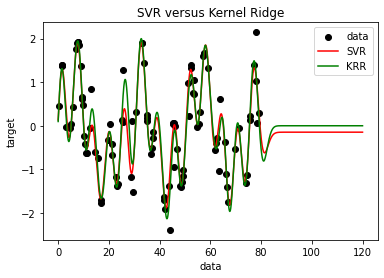

In [4]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# modified for the purpose of this notebook
# License: BSD 3 clause

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 80 * rng.rand(320000, 1)
y = (np.sin(X) + np.sin(X/4)).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 120, 600000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)},
                   cv=3)

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)},
                  cv=3)

svr.fit(X[:train_size], y[:train_size])

kr.fit(X[:train_size], y[:train_size])

y_svr = svr.predict(X_plot)

y_kr = kr.predict(X_plot)


# #############################################################################
# Look at the results
# sv_ind = svr.best_estimator_.support_
# plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
#             zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR')
plt.plot(X_plot, y_kr, c='g',
         label='KRR')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

plt.show()

#### Klasteryzacja

In [8]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=4000, centers=centers, cluster_std=0.3)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
model = MeanShift(bandwidth=bandwidth)

# model = AgglomerativeClustering()

model.fit(X)

try:
    cluster_centers = model.cluster_centers_
except AttributeError:
    pass  # ignore

labels = model.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : {}".format(n_clusters_))


number of estimated clusters : 3


In [9]:
model.predict(centers)

array([2, 1, 0])

[ 1.00980835 -1.00388739]
[-0.99264539 -1.02192199]
[1.02459135 0.99518641]


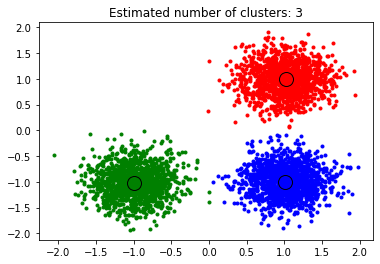

In [10]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    try:
        cluster_center = cluster_centers[k]
        print(cluster_center)
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
    except NameError:
        pass  # ignore
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

#### Redukcja wymiarów

(150, 4)


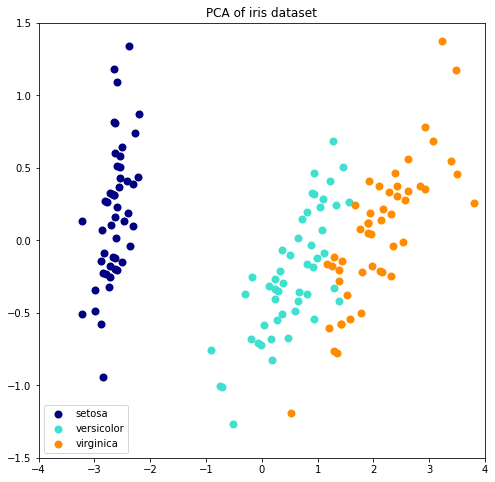

In [11]:
# Authors: Gaël Varoquaux, Kyle Kastner
# compiled and modified
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import decomposition

n_components = 2

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)

pca = decomposition.PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

if n_components == 2:

    colors = ['navy', 'turquoise', 'darkorange']

    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                    color=color, lw=2, label=target_name)

    plt.title("PCA of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

    plt.show()

else:
    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()

    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X_pca[y == label, 0].mean(),
                  X_pca[y == label, 1].mean() + 1.5,
                  X_pca[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.nipy_spectral,
               edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()


### Zapis i odczyt modelu
Sposób 1:

In [ ]:
from joblib import dump, load
dump(classifier, 'filename.joblib')
# ...
classifier2 = load('filename.joblib')
predicted = classifier2.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier2, metrics.classification_report(y_test, predicted))
     )

Sposób 2:

https://scikit-learn.org/stable/related_projects.html#related-projects